In [1]:
import numpy as np
import matplotlib.pyplot as plt

#Default class for a 2D Ising model on a square lattice
class IsingModel:
    """2D Ising model on a square lattice."""
    def __init__(self, size: int, J: float = 1.0):
        '''Initalizes important parameters:
        size:the size of our square lattice, and J:coupling strength between spins'''
        self.size = size
        self.J = J
        self.state = None

    def initialize_random(self, spin_up_fraction=0.5):
        '''creates state, a sizexsize square lattice of 1's and -1's.
         spin_up_fraction determines % of lattice sites that are 1's. '''
        self.state = np.random.choice([-1, 1], size=(self.size, self.size),
                                      p=[1-spin_up_fraction, spin_up_fraction])
        return self.state

    def energy(self, state=None):
        '''Calculates change in energy based on intereaction with right-neighbor spins
          and down-neighbor spins'''
        if state is None:
            state = self.state

        energy = 0.0
        energy -= self.J * np.sum(state * np.roll(state, -1, axis=1))
        energy -= self.J * np.sum(state * np.roll(state, -1, axis=0))
        return energy

    def magnetization(self, state=None):
        '''returns the magnetization = the average spin value'''
        if state is None:
            state = self.state
        return np.mean(state)

    def simulate(self, temperature, n_steps):  # Metropolis algorithm
        '''Uses the metropolis algorithm to keep or reject random spin flips.
        Returns states, energies, and magnetizations.'''
        states = [self.state.copy()]
        energies = [self.energy()]
        magnetizations = [self.magnetization()]

        for step in range(n_steps):
            # Pick random spin
            i = np.random.randint(0, self.size)
            j = np.random.randint(0, self.size)

            # Flip it
            new_state = self.state.copy()
            new_state[i, j] *= -1

            # Metropolis criterion
            E_old = self.energy()
            E_new = self.energy(new_state)
            delta_E = E_new - E_old

            if delta_E < 0 or np.random.rand() < np.exp(-delta_E / temperature):
                self.state = new_state

            if (step + 1) % 100 == 0:
                states.append(self.state.copy())
                energies.append(self.energy())
                magnetizations.append(self.magnetization())

        return states, energies, magnetizations


import networkx as nx

class TriangularIsingModel(IsingModel):
    '''Ising Model on a triangular lattice.
    We'll use networkx to generate our triangular lattice, and then '''

    def __init__(self, size, J=1.0):
        super().__init__(size, J)
        self.G = nx.generators.lattice.triangular_lattice_graph(size, size) # Create triangular lattice graph

        # Convert node labels to (i,j) pairs, and make a list of nodes
        self.G = nx.convert_node_labels_to_integers(self.G, ordering="sorted")
        self.nodes = list(self.G.nodes())

    def initialize_random(self, spin_up_fraction):
        '''Initalize each node as a 1 or -1, with given probability for spin_up_fraction. Store spin in a dictionary.'''
        self.state = {
            node: np.random.choice([-1, 1], p=[1-spin_up_fraction, spin_up_fraction])
            for node in self.nodes
        }
        return self.state

    def energy(self, state=None):
        '''Calcuates the energy of the state based on neighbors'''
        if state is None:
            state = self.state

        E = 0.0
        for u, v in self.G.edges():
            E -= self.J * state[u] * state[v]
        return E

    def magnetization(self, state=None):
        '''Evaluated mangetization (average spin) for lattice.'''
        if state is None:
            state = self.state
        return np.mean(list(state.values()))

    def simulate(self, temperature, n_steps):
        """Metropolis simulation on graph-based Ising model."""
        states = [self.state.copy()]
        energies = [self.energy()]
        magnetizations = [self.magnetization()]

        for step in range(n_steps):
            # pick random node
            node = np.random.choice(self.nodes)

            # propose flip
            new_state = self.state.copy()
            new_state[node] *= -1

            # energies
            E_old = self.energy()
            E_new = self.energy(new_state)
            dE = E_new - E_old

            # Metropolis acceptance
            if dE < 0 or np.random.rand() < np.exp(-dE / temperature):
                self.state = new_state

            # record every 100
            if (step+1) % 100 == 0:
                states.append(self.state.copy())
                energies.append(self.energy())
                magnetizations.append(self.magnetization())

        return states, energies, magnetizations


class HexagonalIsingModel(IsingModel):
    '''Ising Model on a hegaxonal lattice.
    Should be able to use the same machinery as the triangular lattice.'''
    def __init__(self, size, J=1.0):
        super().__init__(size, J)
        self.G = nx.generators.lattice.hexagonal_lattice_graph(size, size) # Create hexagonal lattice graph

        # Convert node labels to (i,j) pairs, and make a list of nodes
        self.G = nx.convert_node_labels_to_integers(self.G, ordering="sorted")
        self.nodes = list(self.G.nodes())

    def initialize_random(self, spin_up_fraction):
        '''Initalize each node as a 1 or -1, with given probability for spin_up_fraction. Store spin in a dictionary.'''
        self.state = {
            node: np.random.choice([-1, 1], p=[1-spin_up_fraction, spin_up_fraction])
            for node in self.nodes
        }
        return self.state

    def energy(self, state=None):
        '''Calcuates the energy of the state based on neighbors'''
        if state is None:
            state = self.state

        E = 0.0
        for u, v in self.G.edges():
            E -= self.J * state[u] * state[v]
        return E

    def magnetization(self, state=None):
        '''Evaluated mangetization (average spin) for lattice.'''
        if state is None:
            state = self.state
        return np.mean(list(state.values()))

    def simulate(self, temperature, n_steps):
        """Metropolis simulation on graph-based Ising model."""
        states = [self.state.copy()]
        energies = [self.energy()]
        magnetizations = [self.magnetization()]

        for step in range(n_steps):
            # pick random node
            node = np.random.choice(self.nodes)

            # propose flip
            new_state = self.state.copy()
            new_state[node] *= -1

            # energies
            E_old = self.energy()
            E_new = self.energy(new_state)
            dE = E_new - E_old

            # Metropolis acceptance
            if dE < 0 or np.random.rand() < np.exp(-dE / temperature):
                self.state = new_state

            # record every 100
            if (step+1) % 100 == 0:
                states.append(self.state.copy())
                energies.append(self.energy())
                magnetizations.append(self.magnetization())

        return states, energies, magnetizations



~ SQUARE LATTICE ~
Lattice size: 100 x 100
Coupling strength J: 1.0
Temperature T: 1.5


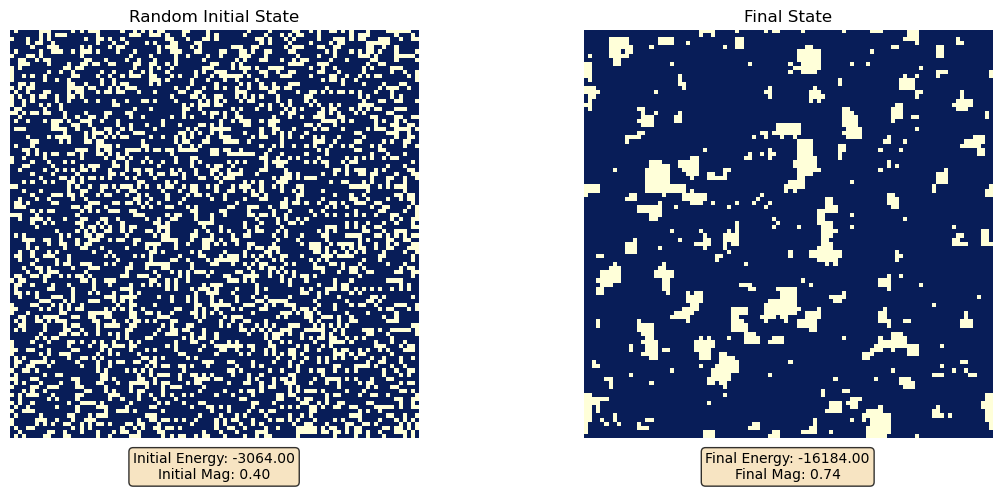

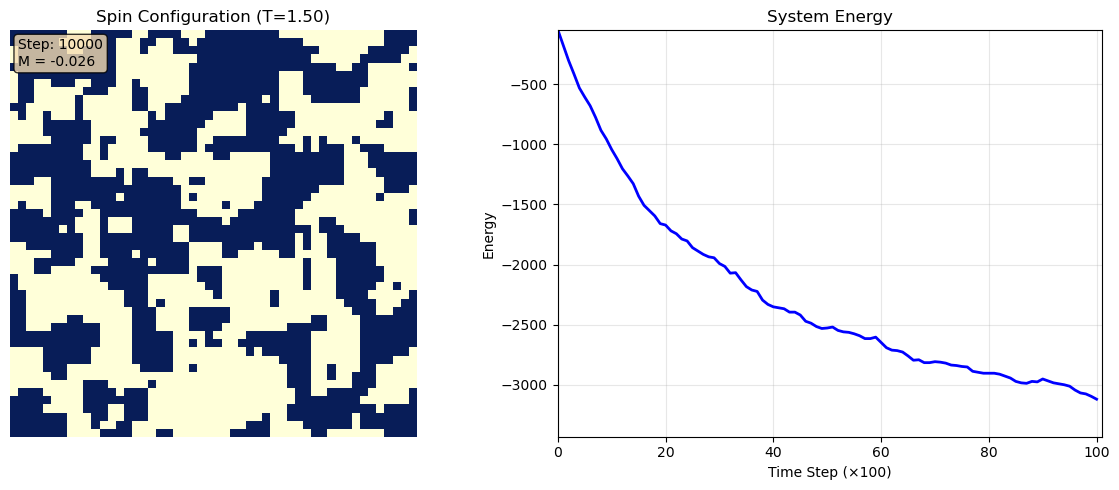

In [2]:
T = 1.5
J = 1.0
model = IsingModel(size=100, J=J)

initial_state = model.initialize_random(spin_up_fraction=0.7)# 70% spin up
states, energies, mags = model.simulate(temperature=T, n_steps=50000)

# Visualize initial and final states
print("~ SQUARE LATTICE ~")
print(f"Lattice size: {model.size} x {model.size}")
print(f"Coupling strength J: {model.J}")
print(f"Temperature T: {T}")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

#Initial state
ax1.imshow(initial_state, cmap='YlGnBu')
ax1.set_title('Random Initial State', fontsize=12)
ax1.axis('off')
initial_text = f"Initial Energy: {energies[0]:.2f}\nInitial Mag: {mags[0]:.2f}"
ax1.text(0.5, -0.1, initial_text, transform=ax1.transAxes,
         ha='center', fontsize=10, bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

#Final state
ax2.imshow(states[-1], cmap='YlGnBu')
ax2.set_title('Final State', fontsize=12)
ax2.axis('off')
final_mag = model.magnetization(states[-1])
final_text = f"Final Energy: {energies[-1]:.2f}\nFinal Mag: {abs(final_mag):.2f}"
ax2.text(0.5, -0.1, final_text, transform=ax2.transAxes,
         ha='center', fontsize=10, bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.show()

#SHOW ANIMATION OF HOW STATE EVOLVES OVER TIME
# Animation
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
def animate_ising(size=50, temperature=2.5, n_steps=10000, interval=50):
    """
    Create an animation of the Ising model evolution.

    Parameters:
    -----------
    size : int
    Lattice size
    temperature : float
    Temperature (critical temperature ~2.27)
    n_steps : int
        Number of Monte Carlo steps
    interval : int
    Delay between frames in milliseconds"""

    # Initialize and run simulation
    model = IsingModel(size=size)
    model.initialize_random()
    states, energies, _ = model.simulate(temperature, n_steps)

    # Set up the figure
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # Spin configuration plot
    im = ax1.imshow(states[0], cmap='YlGnBu', vmin=-1, vmax=1, interpolation='nearest')
    ax1.set_title(f'Spin Configuration (T={temperature:.2f})', fontsize=12)
    ax1.axis('off')

    # Energy plot
    energy_line, = ax2.plot([], [], 'b-', linewidth=2)
    ax2.set_xlim(0, len(states))
    ax2.set_ylim(min(energies) * 1.1, max(energies) * 1.1)
    ax2.set_xlabel('Time Step (×100)')
    ax2.set_ylabel('Energy')
    ax2.set_title('System Energy')
    ax2.grid(True, alpha=0.3)

    # Text annotations
    mag_text = ax1.text(0.02, 0.98, '', transform=ax1.transAxes,
                        fontsize=10, verticalalignment='top',
                        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

    def init():
        im.set_data(states[0])
        energy_line.set_data([], [])
        mag_text.set_text('')
        return im, energy_line, mag_text

    def update(frame):
        # Update spin configuration
        im.set_data(states[frame])

        # Update energy plot
        x_data = list(range(frame + 1))
        y_data = energies[:frame + 1]
        energy_line.set_data(x_data, y_data)

        # Update magnetization text
        mag = np.mean(states[frame])
        mag_text.set_text(f'Step: {frame * 100}\nM = {mag:.3f}')

        return im, energy_line, mag_text

    anim = FuncAnimation(fig, update, init_func=init,
                        frames=len(states), interval=interval,
                        blit=True, repeat=True)

    plt.tight_layout()
    return anim

anim = animate_ising(size=50, temperature=T, n_steps=10000)
HTML(anim.to_jshtml())



~ TRIANGULAR LATTICE ~
Lattice size: 20 x 20
Coupling strength J: 1.0
Temperature T: 1.5


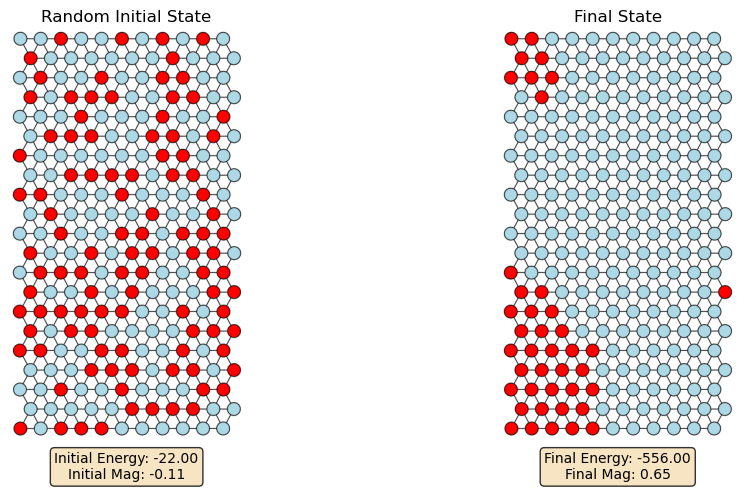

In [3]:
triangular_model = TriangularIsingModel(size=20, J=J) #input periodic boundary conditions for both tri and hex
#find crit temp: ~3.6? use energy over time +magnetization over time plots
# T=0

# Visualize initial and final states for triangular lattice
print("~ TRIANGULAR LATTICE ~")
print(f"Lattice size: {triangular_model.size} x {triangular_model.size}")
print(f"Coupling strength J: {triangular_model.J}")
print(f"Temperature T: {T}")

# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

##This needs to be doen with graphviz, imshow not compatible with dictionaries

import math
from graphviz import Graph
from IPython.display import Image, display

def lattice_positions_from_size(size):
    """
    Build a triangular lattice with integer node labels (using sorted' ordering) and return a
    dict mapping integer node -> (x,y). Equilateral-triangle geometry: horizontal spacing 1, vertical spacing sqrt(3)/2.
    """
    # build a fresh triangular lattice and convert labels while keeping original coords
    Gtmp = nx.generators.lattice.triangular_lattice_graph(size, size)
    # convert to integers but keep original coords in node attribute 'coord'
    G_int = nx.convert_node_labels_to_integers(Gtmp, ordering="sorted", label_attribute="coord")

    pos = {}
    dy = math.sqrt(3) / 2.0
    for n, data in G_int.nodes(data=True):
        coord = data.get("coord")
        # original coords are likely (i, j) tuples
        if isinstance(coord, tuple) and len(coord) >= 2:
            i, j = coord[0], coord[1]
            x = i + 0.5 * (j % 2)   # offset every other row to make triangular packing
            y = j * dy
            pos[n] = (x, y)
        else:
            # fallback: use spring layout (should not happen for triangular_lattice_graph)
            pos[n] = (0.0, 0.0)
    return pos

def visualize_state_graphviz(model, state, filename, pos=None, node_size=0.22):
    """
    Render the graph state using graphviz and save to filename (without extension).
    - model: instance of TriangularIsingModel
    - state: dict mapping node->spin (+1 or -1)
    - filename: path prefix (Graphviz will create filename+'.png')
    - pos: optional dict node -> (x,y). If None, computed from model.size
    - node_size: approximate node diameter in inches for Graphviz fixedsize
    """
    if pos is None:
        pos = lattice_positions_from_size(model.size)

    # Create an undirected graph in graphviz using neato (pos attributes respected)
    g = Graph(engine="neato", format="png")
    # Graph attributes to make positions fixed
    g.attr(overlap="false")
    g.attr(splines="true")  # nice straight/curved edges depending on geometry
    g.attr(nodesep="0.08")

    # Add nodes with fill colors according to spins
    for n in model.nodes:
        spin = state.get(n, 1)
        # choose color scheme (you can change names)
        if spin == 1:
            fill = "red"
        else:
            fill = "lightblue"
        x, y = pos[n]
        # Graphviz pos expects "x,y!" (the '!' tells neato to use it as fixed position)
        pos_str = f"{x},{y}!"
        # set fixedsize and width so nodes are visually small and consistent
        g.node(str(n),
               label="",
               style="filled",
               fillcolor=fill,
               shape="circle",
               pos=pos_str,
               width=str(node_size),
               fixedsize="true")
    # Add edges
    for u, v in model.G.edges():
        g.edge(str(u), str(v), arrowhead="none")

    png_bytes = g.pipe(format="png")
    return png_bytes
    # # Render into memory and display
    # png_bytes = g.pipe(format="png")
    # display(Image(png_bytes))


import io

# Create model (uses your TriangularIsingModel implementation)
# model = TriangularIsingModel(size=5, J=J)

# store initial random state and visualize it
initial_state_tri = triangular_model.initialize_random(spin_up_fraction=0.5)  # 70% spin up

initial_state = initial_state_tri.copy()
pos = lattice_positions_from_size(triangular_model.size)
initial_png = visualize_state_graphviz(triangular_model, initial_state, filename="triangular_initial", pos=pos)

# Run simulation
states_tri, energies_tri, mags_tri = triangular_model.simulate(temperature=T, n_steps=5000)

# Final state (after simulation)
final_state = triangular_model.state.copy()
final_png = visualize_state_graphviz(triangular_model, final_state, filename="triangular_final", pos=pos)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

#Initial state
ax1.imshow(plt.imread(io.BytesIO(initial_png)))
ax1.set_title('Random Initial State', fontsize=12)
ax1.axis('off')
initial_text = f"Initial Energy: {energies_tri[0]:.2f}\nInitial Mag: {mags_tri[0]:.2f}"
ax1.text(0.5, -0.1, initial_text, transform=ax1.transAxes,
         ha='center', fontsize=10, bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

#Final state
ax2.imshow(plt.imread(io.BytesIO(final_png)))
ax2.set_title('Final State', fontsize=12)
ax2.axis('off')
final_mag = triangular_model.magnetization(states_tri[-1])
final_text = f"Final Energy: {energies_tri[-1]:.2f}\nFinal Mag: {abs(final_mag):.2f}"
ax2.text(0.5, -0.1, final_text, transform=ax2.transAxes,
         ha='center', fontsize=10, bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.show()

~ HEXAGONAL LATTICE ~
Lattice size: 7 x 7
Coupling strength J: 1.0
Temperature T: 1.5


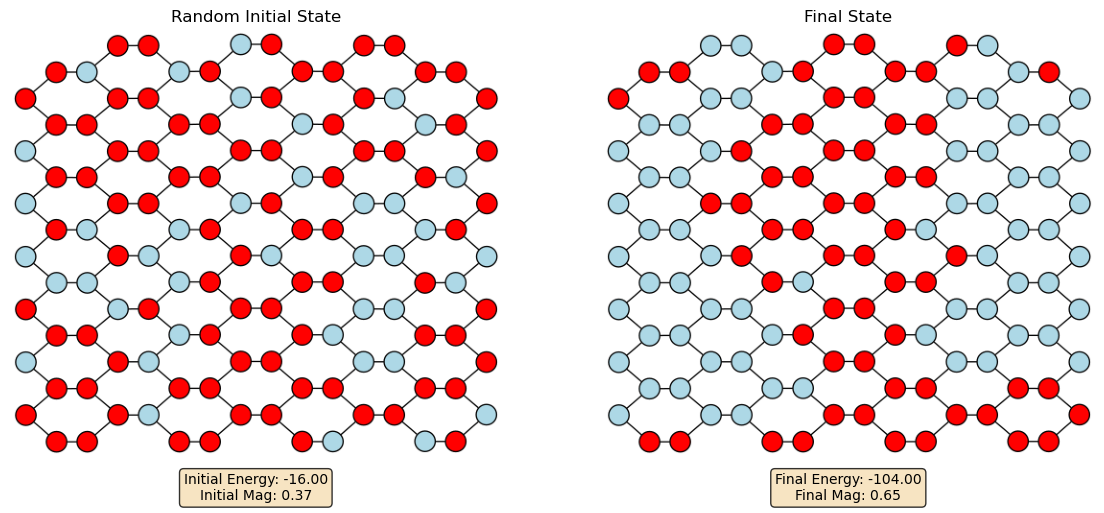

In [4]:
hexagonal_model = HexagonalIsingModel(size=7, J=J)
#find crit temp: ~1.5? add periodic boundary condition, use energy over time +magnetization over time plots

# Visualize initial and final states for triangular lattice
print("~ HEXAGONAL LATTICE ~")
print(f"Lattice size: {hexagonal_model.size} x {hexagonal_model.size}")
print(f"Coupling strength J: {hexagonal_model.J}")
print(f"Temperature T: {T}")

# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

##This needs to be doen with graphviz, imshow not compatible with dictionaries

# import math
# from graphviz import Graph
# from IPython.display import Image, display

def hex_lattice_positions_from_size(size):
    """
    Build a hexagonal lattice with integer node labels (using sorted' ordering) and return a
    dict mapping integer node -> (x,y). Equilateral-triangle geometry: horizontal spacing 1, vertical spacing sqrt(3)/2. #change to regular hexagon
    """
    # build a fresh hexagonal lattice and convert labels while keeping original coords
    Gtmp = nx.generators.lattice.hexagonal_lattice_graph(size, size)
    # convert to integers but keep original coords in node attribute 'coord'
    G_int = nx.convert_node_labels_to_integers(Gtmp, ordering="sorted", label_attribute="coord")

    color = nx.algorithms.bipartite.color(G_int)  # {node: 0 or 1}

    # ---- 2. Compute positions based on bipartite parity ----
    pos = {}
    h = math.sqrt(3)/2     # vertical spacing
    dx = 1.0               # horizontal base unit

    for n in G_int.nodes():
        # get original integer coordinates just to spread rows/columns
        (i, j) = G_int.nodes[n]['coord']

        # correct honeycomb staggering:
        #           COLOR decides which nodes shift, not i or j.
        x = 2*dx*i + dx * color[n]     # shift "black" nodes to the right
        y = h * j

        pos[n] = (x, y)

    # pos = {}
    # dy = math.sqrt(3) / 2.0 #these are the values to change for hexagonal
    # for n, data in G_int.nodes(data=True):
    #     coord = data.get("coord")
    #     # original coords are likely (i, j) tuples
    #     if isinstance(coord, tuple) and len(coord) >= 2:
    #         i, j = coord[0], coord[1]
    #         x = 3*i + (j % 2) * 1.5
    #         y = j * dy
    #         pos[n] = (x, y)
    #     else:
    #         # fallback: use spring layout
    #         pos[n] = (0.0, 0.0)
    return pos

def hex_visualize_state_graphviz(hex_model, state, filename, pos=None, node_size=0.22):
    """
    Render the graph state using graphviz and save to filename (without extension).
    - model: instance of HexagonalIsingModel
    - state: dict mapping node->spin (+1 or -1)
    - filename: path prefix (Graphviz will create filename+'.png')
    - pos: optional dict node -> (x,y). If None, computed from model.size
    - node_size: approximate node diameter in inches for Graphviz fixedsize
    """
    if pos is None:
        pos = hex_lattice_positions_from_size(hex_model.size)

    # Create an undirected graph in graphviz using neato (pos attributes respected)
    g = Graph(engine="neato", format="png")
    # Graph attributes to make positions fixed
    g.attr(overlap="false")
    g.attr(splines="true")  # nice straight/curved edges depending on geometry
    g.attr(nodesep="0.08")

    # Add nodes with fill colors according to spins
    for n in hex_model.nodes:
        spin = state.get(n, 1)
        # choose color scheme (you can change names)
        if spin == 1:
            fill = "red"
        else:
            fill = "lightblue"
        x, y = pos[n]
        # Graphviz pos expects "x,y!" (the '!' tells neato to use it as fixed position)
        pos_str = f"{x},{y}!"
        # set fixedsize and width so nodes are visually small and consistent
        g.node(str(n),
               label="",
               style="filled",
               fillcolor=fill,
               shape="circle",
               pos=pos_str,
               width=str(node_size),
               fixedsize="true")
    # Add edges
    for u, v in hex_model.G.edges():
        g.edge(str(u), str(v), arrowhead="none")

    png_bytes = g.pipe(format="png")
    return png_bytes
    # # Render into memory and display
    # png_bytes = g.pipe(format="png")
    # display(Image(png_bytes))


# import io

# Create model (uses your TriangularIsingModel implementation)
# model = TriangularIsingModel(size=5, J=J)

# store initial random state and visualize it
initial_state_hex = hexagonal_model.initialize_random(spin_up_fraction=0.7)  # 70% spin up

initial_state = initial_state_hex.copy()
pos = hex_lattice_positions_from_size(hexagonal_model.size)
initial_png = hex_visualize_state_graphviz(hexagonal_model, initial_state, filename="hexagonal_initial", pos=pos)

# Run simulation
states_hex, energies_hex, mags_hex = hexagonal_model.simulate(temperature=T, n_steps=1000)

# Final state (after simulation)
final_state = hexagonal_model.state.copy()
final_png = hex_visualize_state_graphviz(hexagonal_model, final_state, filename="hexagonal_final", pos=pos)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

#Initial state
ax1.imshow(plt.imread(io.BytesIO(initial_png)))
ax1.set_title('Random Initial State', fontsize=12)
ax1.axis('off')
initial_text = f"Initial Energy: {energies_hex[0]:.2f}\nInitial Mag: {mags_hex[0]:.2f}"
ax1.text(0.5, -0.1, initial_text, transform=ax1.transAxes,
         ha='center', fontsize=10, bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

#Final state
ax2.imshow(plt.imread(io.BytesIO(final_png)))
ax2.set_title('Final State', fontsize=12)
ax2.axis('off')
final_mag = hexagonal_model.magnetization(states_tri[-1])
final_text = f"Final Energy: {energies_hex[-1]:.2f}\nFinal Mag: {abs(final_mag):.2f}"
ax2.text(0.5, -0.1, final_text, transform=ax2.transAxes,
         ha='center', fontsize=10, bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.show()